In [1]:
import sys
caffe_root = '/home/csunix/schtmt/NewFolder/caffe_Sep/'
#print sys.path
sys.path.insert(0,caffe_root + 'python')
import caffe
import h5py
import numpy as np
import matplotlib.pyplot as plt



def visualize_weights(net, layer_name, padding=4, filename=''):
    # The parameters are a list of [weights, biases]
    data = np.copy(net.params[layer_name][0].data)
    # N is the total number of convolutions
    N = data.shape[0] * data.shape[1]
    print N
    print data.shape
    # Ensure the resulting image is square
    filters_per_row = int(np.ceil(np.sqrt(N)))
    # Assume the filters are square
    filter_size = data.shape[2]
    # Size of the result image including padding
    result_size = filters_per_row * (filter_size + padding) - padding
    # Initialize result image to all zeros
    result = np.zeros((result_size, result_size))

    # Tile the filters into the result image
    filter_x = 0
    filter_y = 0
    for n in range(data.shape[0]):
        for c in range(data.shape[1]):
            if filter_x == filters_per_row:
                filter_y += 1
                filter_x = 0
            for i in range(filter_size):
                for j in range(filter_size):
                    result[filter_y * (filter_size + padding) + i, filter_x * (filter_size + padding) + j] = data[
                        n, c, i, j]
            filter_x += 1
    print result.shape
    # Normalize image to 0-1
    min = result.min()
    max = result.max()
    result = (result - min) / (max - min)

    # Plot figure
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(result, cmap='gray', interpolation='nearest')

    # Save plot if filename is set
    if filename != '':
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)

    plt.show()

def H_visualize_weights(net, layer_name, padding=4, filename=''):
    # follow the method of "display_network.m"
    # The parameters are a list of [weights, biases]
    data = np.copy(net.params[layer_name][0].data)
    # N is the total number of convolutions
    N = data.shape[0] * data.shape[1]
    print N
    print data.shape
    # a = data[1,0,:,:]
    # print abs(a).min()
    # Ensure the resulting image is square
    filters_per_row = int(np.ceil(np.sqrt(N)))
    # Assume the filters are square
    filter_size = data.shape[2]
    # Size of the result image including padding
    result_size = filters_per_row * (filter_size + padding) - padding
    # Initialize result image to all zeros
    result = np.ones((result_size, result_size))

    # Tile the filters into the result image
    filter_x = 0
    filter_y = 0
    for n in range(data.shape[0]):
        for c in range(data.shape[1]):
            if filter_x == filters_per_row:
                filter_y += 1
                filter_x = 0
            # for i in range(filter_size):
            #     for j in range(filter_size):
            #         result[filter_y * (filter_size + padding) + i, filter_x * (filter_size + padding) + j] = data[
            #             n, c, i, j]
            result_temp = data[n,c,:,:]
            clim = abs(result_temp).max()
            result[filter_y * (filter_size + padding):filter_y * (filter_size + padding) + filter_size,
            filter_x * (filter_size + padding):filter_x * (filter_size + padding) + filter_size] = data[n,c,:,:]/clim
            filter_x += 1
    print result.shape
    # # Normalize image to 0-1
    # min = result.min()
    # max = result.max()
    # result = (result - min) / (max - min)

    # Plot figure
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(result, cmap='gray', interpolation='nearest')

    # Save plot if filename is set
    if filename != '':
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)

    plt.show()

In [2]:
caffe.set_mode_cpu()
# model_def = caffe_root + 'examples/mnist_wta_autoencoder/mnist_wta_test.prototxt'
#model_weights = caffe_root + 'examples/mnist_wta_autoencoder/mnist_GlobalWta_iter_60000.caffemodel'
# model_weights = '/usr/not-backed-up/1_convlstm/mnist_wta_sep2017_Ver1/mnist_GlobalWta_iter_60000.caffemodel'
# model_weights = '/usr/not-backed-up/1_convlstm/mnist_wta_cross_entropy_loss_sep2017/mnist_GlobalWta_iter_60000.caffemodel'
model_def = caffe_root + 'examples/mnist_wta_autoencoder/mnist_wta_leakyReLU_test.prototxt'
model_weights = '/usr/not-backed-up/1_convlstm/mnist_wta_leakyReLU_sep2017/mnist_GlobalWta_iter_99600.caffemodel'
# Load model
net = caffe.Net( model_def,model_weights, caffe.TEST)
data = np.copy(net.params['deconv'][0].data)

##################################################################
# create hdf5 file to check in Matlab
# h5f = h5py.File('deconvWeight.h5','w') # w means write
# h5f.create_dataset('weight',data = data)
# h5f.close()
#########

64
(64, 1, 11, 11)
(116, 116)


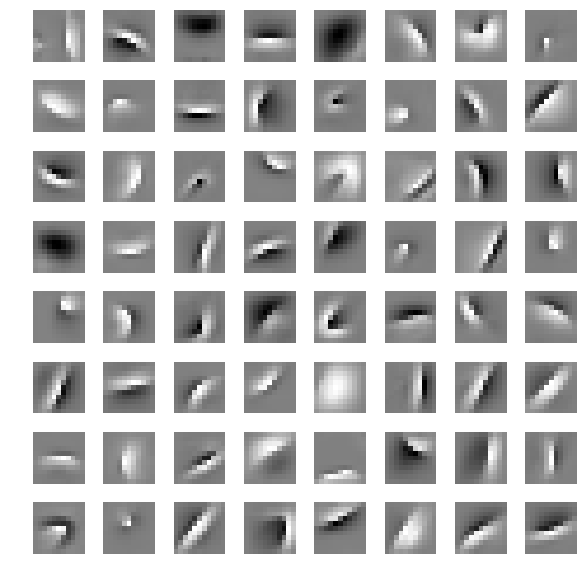

In [3]:
# visualize_weights(net, 'conv1', filename='conv1.png')
#visualize_weights(net, 'deconv', filename='deconv.png')
H_visualize_weights(net, 'deconv', filename='deconv_MatlabDisplay.png')